In [1]:
import os
os.environ["Method"] = "stochastic"
import nonlinear_solver_initial as solver     #solves opt. problems for terminal VF
import nonlinear_solver_iterate as solviter   #solves opt. problems during VFI
import interpolation as interpol              #interface to sparse grid library/terminal VF
import interpolation_iter as interpol_iter    #interface to sparse grid library/iteration
import postprocessing as post                 #computes the L2 and Linfinity error of the model
from parameters import *
import TasmanianSG                            #sparse grid library
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

In [2]:
def main():
    valnew_dict = dict()
    # terminal value function
    valnew=TasmanianSG.TasmanianSparseGrid()
    if (numstart==0):
        valnew=interpol.sparse_grid(n_agents, iDepth)
        valnew_dict[numstart] = valnew
        valnew.write("valnew_1." + str(numstart) + ".txt") #write file to disk for restart

    # value function during iteration
    else:
        valnew_dict[numstart] = valnew
        valnew.read("valnew_1." + str(numstart) + ".txt")  #write file to disk for restart

    valold=TasmanianSG.TasmanianSparseGrid()
    valold=valnew

    for i in range(numstart, numits):
        valnew=TasmanianSG.TasmanianSparseGrid()
        valnew=interpol_iter.sparse_grid_iter(n_agents, iDepth, valold)
        valold=TasmanianSG.TasmanianSparseGrid()
        valold=valnew
        valnew_dict[i+1] = valnew
        valnew.write("valnew_1." + str(i+1) + ".txt")

    #======================================================================
    print( "===============================================================")
    print( " " )
    print( " Computation of a growth model of dimension ", n_agents ," finished after ", numits, " steps")
    print( " " )
    print( "===============================================================")
    #======================================================================

    # compute errors   
    avg_err=post.ls_error(n_agents, numstart, numits, No_samples)
    
    #======================================================================
    print( "===============================================================")
    print( " ")
    print( " Errors are computed -- see errors.txt")
    print( " ")
    print( "===============================================================")
    #======================================================================
    return valnew_dict

In [3]:
valnew_dict = main()
errors = np.loadtxt('errors.txt')

 
(' Computation of a growth model of dimension ', 2, ' finished after ', 15, ' steps')
 
 
 Errors are computed -- see errors.txt
 


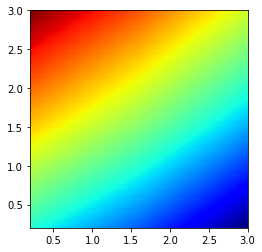

<module 'matplotlib.pyplot' from '/software/python-2.7.12-el7-x86_64/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [4]:
valnew_dict[10].plotResponse2D()

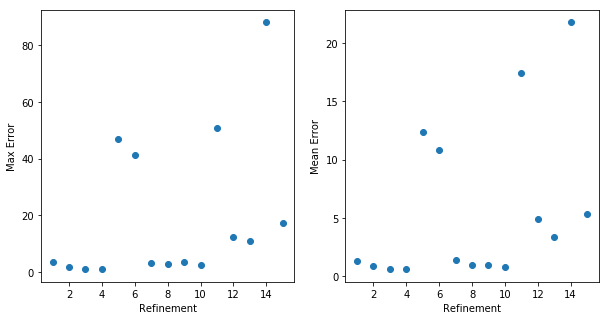

In [5]:
def draw_plots(errors):
    refinement = errors[:,0]
    error_max = errors[:,1]
    error_mean = errors[:,2]
    
    fig, ax = plt.subplots(1, 2, figsize=(10,5))
    ax[0].scatter(refinement, error_max)
    ax[0].set_xlabel('Refinement')
    ax[0].set_ylabel('Max Error')
    
    ax[1].scatter(refinement, error_mean)
    ax[1].set_xlabel('Refinement')
    ax[1].set_ylabel('Mean Error')
    
    return fig, ax

fig, ax = draw_plots(errors)
plt.show()

In [6]:
def draw_3d_grid(valnew_dict):
    fig = plt.figure()
    ax = Axes3D(fig)
    
    print('fig size: {0} DPI, size in inches {1}'.format(
        fig.get_dpi(), fig.get_size_inches()))

    ax.scatter([],[],[])

    def update(i):
        label = 'refinement {0}'.format(i+1)
        ax.scatter(valnew_dict[i].getPoints()[:,0], valnew_dict[i].getPoints()[:,1],valnew_dict[i].evaluateBatch(valnew_dict[i].getPoints()),color='blue')
        ax.set_title(label)

    anim = FuncAnimation(fig, update, frames=np.arange(0, 16), interval=1000)
    return anim

anim = draw_3d_grid(valnew_dict)
HTML(anim.to_jshtml())


fig size: 72.0 DPI, size in inches [6. 4.]


In [7]:
plt.close()

In [8]:

def draw_3d_graph(valnew_dict, num_points=100, n_agents=2):
    fig = plt.figure()
    ax = Axes3D(fig)
    np.random.seed(0)
    
    unif=np.random.rand(num_points, n_agents)
    k_sample=k_bar+(unif)*(k_up-k_bar)
    
    print('fig size: {0} DPI, size in inches {1}'.format(
        fig.get_dpi(), fig.get_size_inches()))

    ax.scatter([],[],[])

    def update(i):
        label = 'refinement {0}'.format(i+1)
        ax.scatter(k_sample[:,0], k_sample[:,1],valnew_dict[i].evaluateBatch(k_sample),color='blue')
        ax.set_title(label)

    anim = FuncAnimation(fig, update, frames=np.arange(0, 16), interval=1000)
    return anim

anim = draw_3d_graph(valnew_dict)
HTML(anim.to_jshtml())



fig size: 72.0 DPI, size in inches [6. 4.]


In [ ]:
plt.close()